In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

# 2020 US Presidential Candidate Joe Biden Twitter Sentiment Analysis

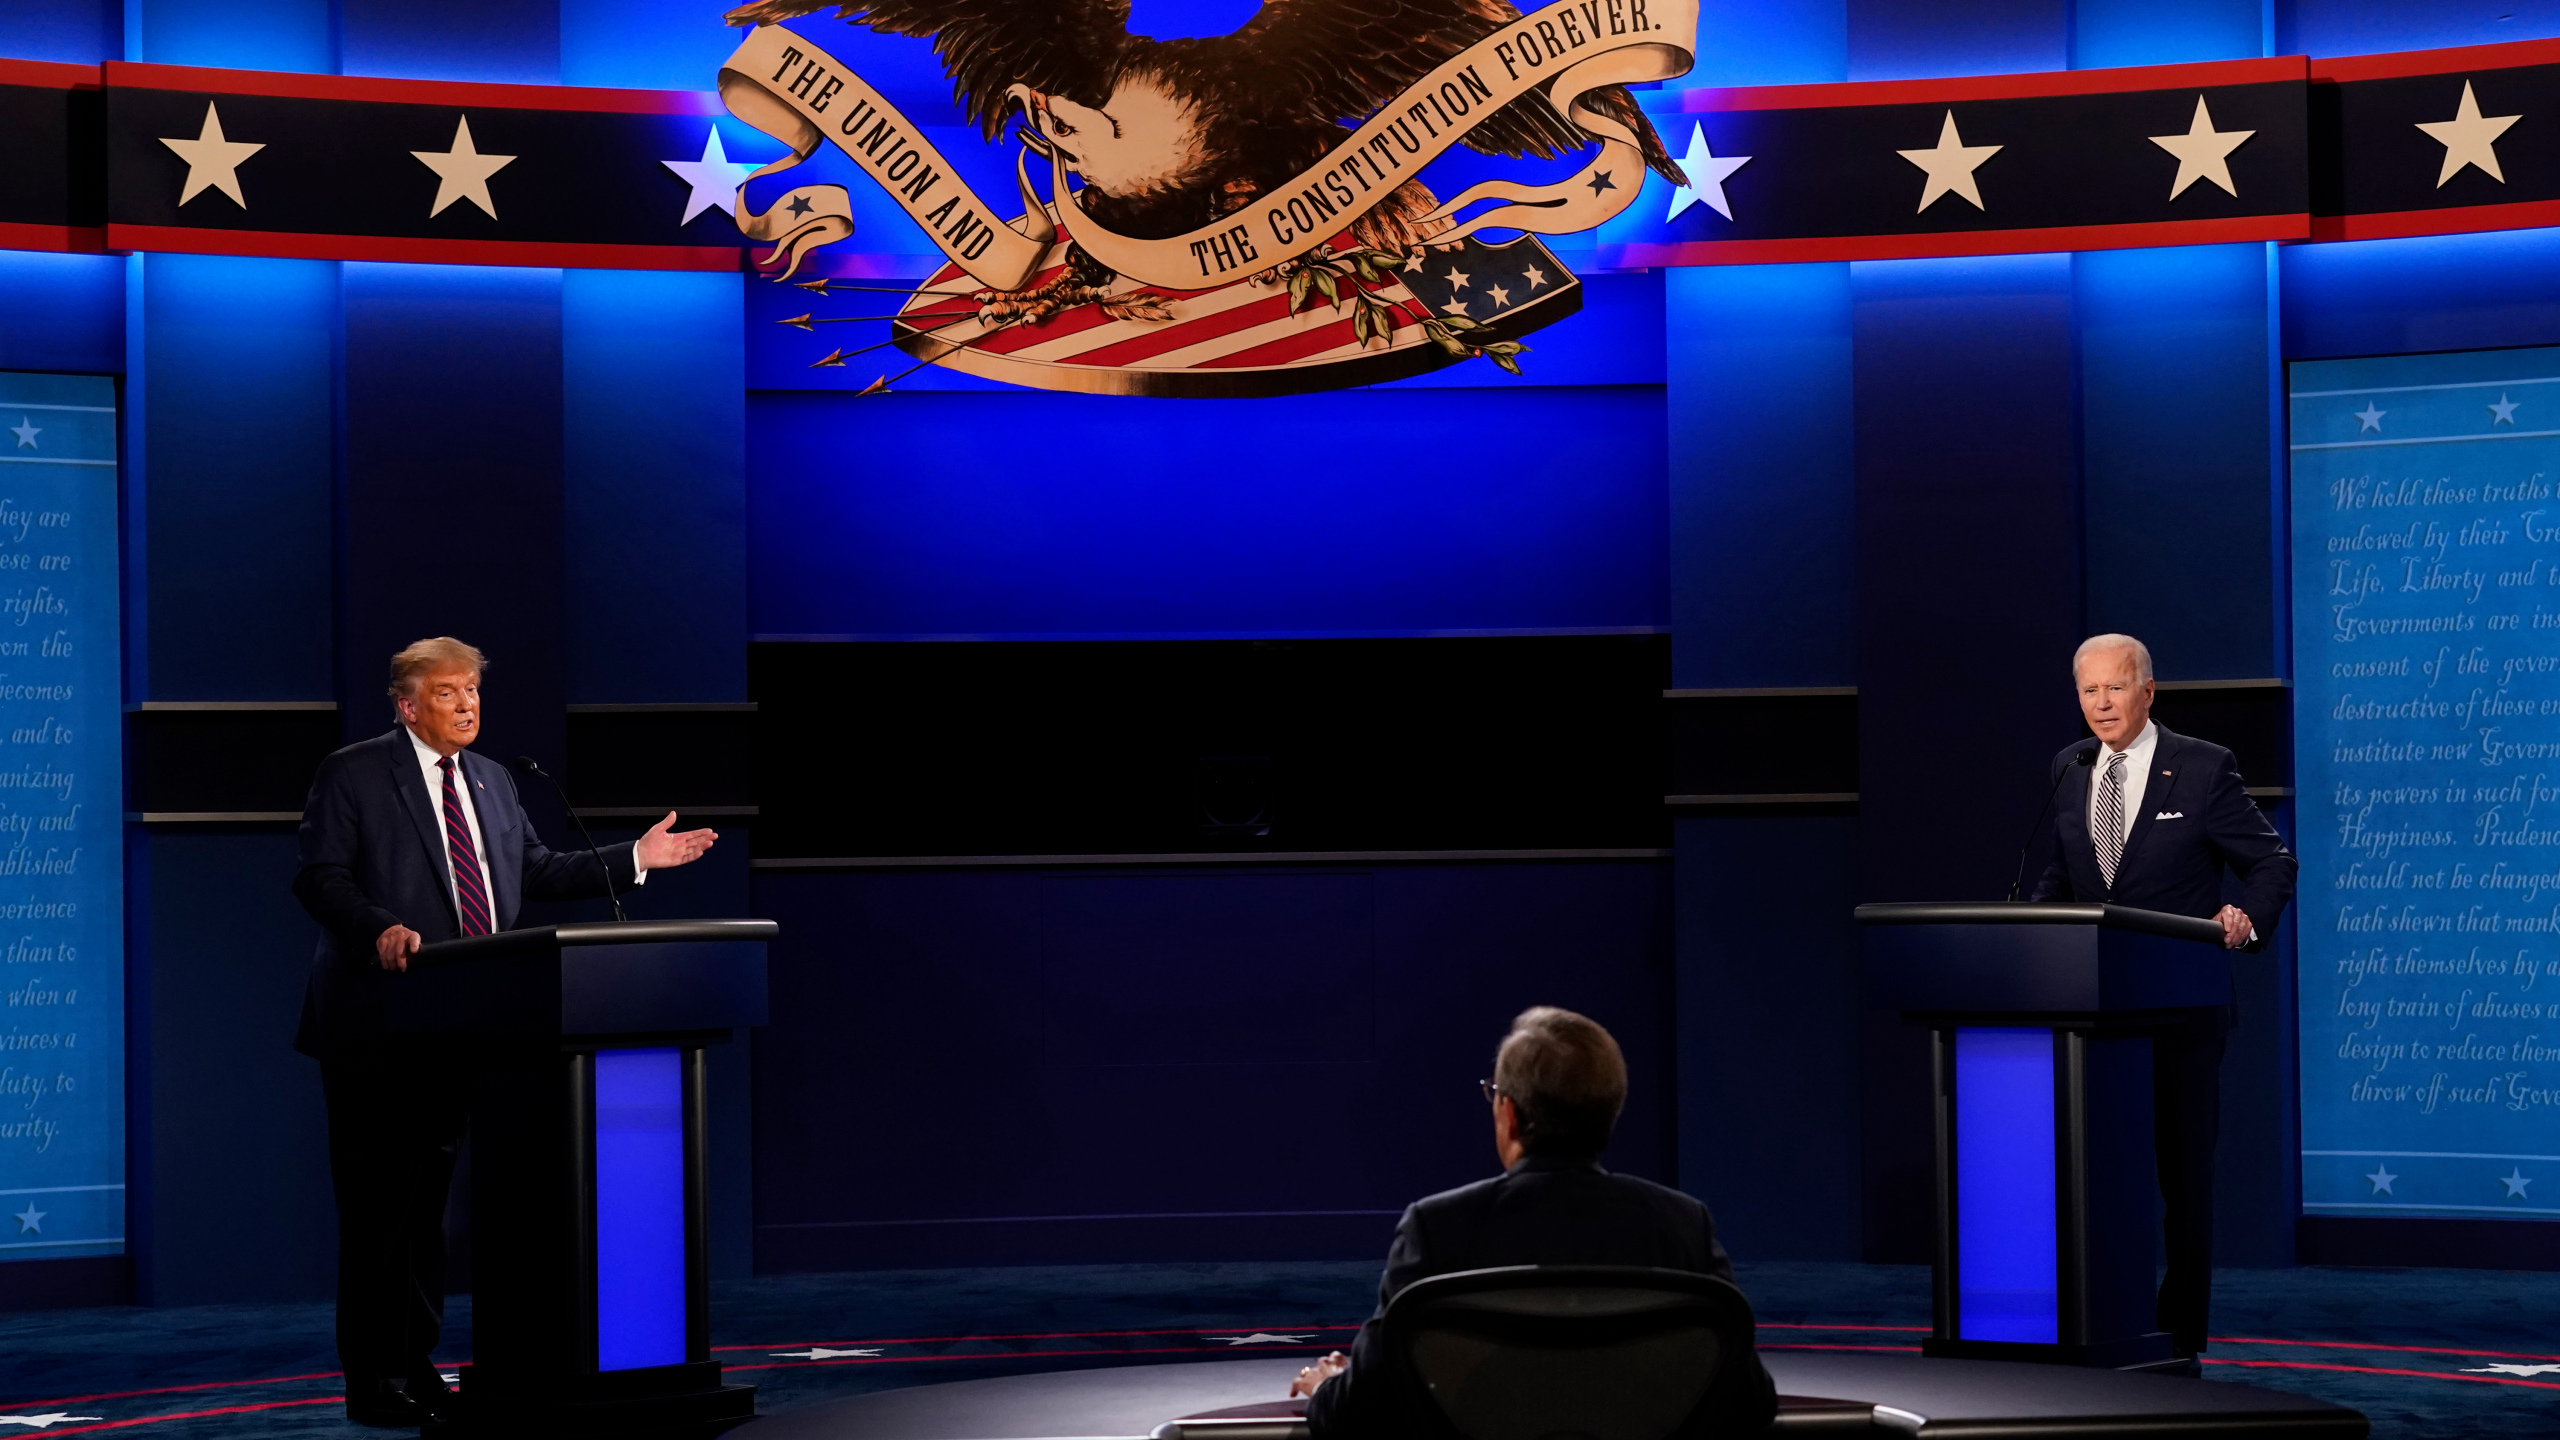

In [3]:
from IPython.display import Image
Image(filename='Election6.jpg')

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer

In [3]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
dfs = pd.read_csv('JoeBidenTweets.csv')

# Tweets Dataset

In [5]:
dfs.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,"I know times are tough, the challenges are dau...",[],2671,23,0.3716,Positive
1,"My dad used to say, “Joey, I don’t expect the ...",[],5447,24,-0.1154,Negative
2,If Congress and President Trump fail to act by...,[],9904,21,-0.7351,Negative
3,Our country is in the middle of a dramatic spi...,[],18726,22,0.3182,Positive
4,"With less than 50 days until Inauguration Day,...",[],1951,23,0.8126,Positive


In [6]:
dfs.isnull().sum()

Tweets            0
Hashtags          0
Retweets          0
word_count        0
Compound Score    0
Sentiment         0
dtype: int64

In [7]:
dfs.shape

(3237, 6)

# Tweets Word Count Distribution

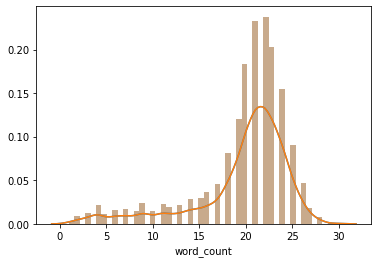

In [8]:
# Word Count Distribution Histogram
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("JB_word_count.png")
sns.distplot(dfs['word_count'])

In [9]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

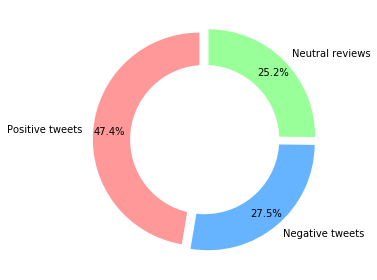

In [10]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('JB_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [11]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
889,Receiving the Medal of Freedom from my friend ...,[],29409,21,0.9818,Positive


# Most Negative Tweet

In [12]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1125,Weapons of war have no place in our communitie...,[],29175,18,-0.9601,Negative


# Positive Tweets

In [13]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,"I know times are tough, the challenges are dau...",[],2671,23,0.3716,Positive
3,Our country is in the middle of a dramatic spi...,[],18726,22,0.3182,Positive
4,"With less than 50 days until Inauguration Day,...",[],1951,23,0.8126,Positive
6,"To everyone who is struggling, I promise you h...",[],3309,14,0.2960,Positive
7,I nominated @neeratanden to lead OMB because s...,[],2590,19,0.5859,Positive


In [14]:
positive_tweets.shape

(1533, 6)

# Negative Tweets

In [15]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1,"My dad used to say, “Joey, I don’t expect the ...",[],5447,24,-0.1154,Negative
2,If Congress and President Trump fail to act by...,[],9904,21,-0.7351,Negative
14,RT @Transition46: If we are going to tackle th...,[],1652,24,-0.5267,Negative
17,RT @Transition46: .@NeeraTanden understands th...,[],2255,20,-0.3612,Negative
20,We’re facing the worst economic crisis since t...,[],3047,20,-0.6908,Negative


In [16]:
negative_tweets.shape

(889, 6)

# Neutral Tweets

In [17]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
5,"On the day I’m inaugurated, I’ll call on the p...",[],5900,24,0.0,Neutral
8,Tune in as I deliver remarks on the final jobs...,[],1839,20,0.0,Neutral
11,Georgia — Our work isn’t over yet.\n\nRegister...,[],7832,19,0.0,Neutral
13,On this International Day of People with Disab...,[],8380,19,0.0,Neutral
16,"Yesterday, I spent the afternoon hearing from ...",[],4408,19,0.0,Neutral


In [18]:
neutral_tweets.shape

(815, 6)

# Wordcloud Function

In [19]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [20]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [21]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

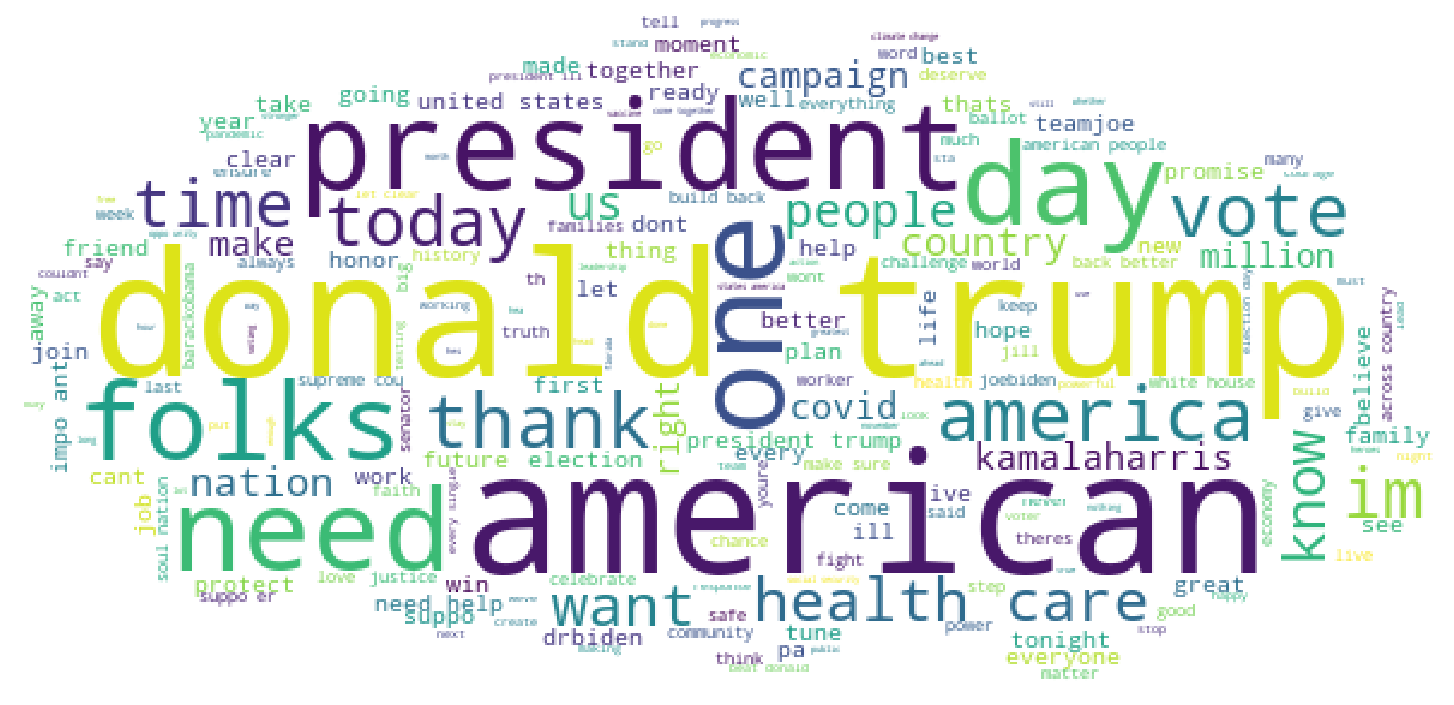

In [22]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('JB_positive_tweets_wc.png')

# WordCloud - Negative Tweets

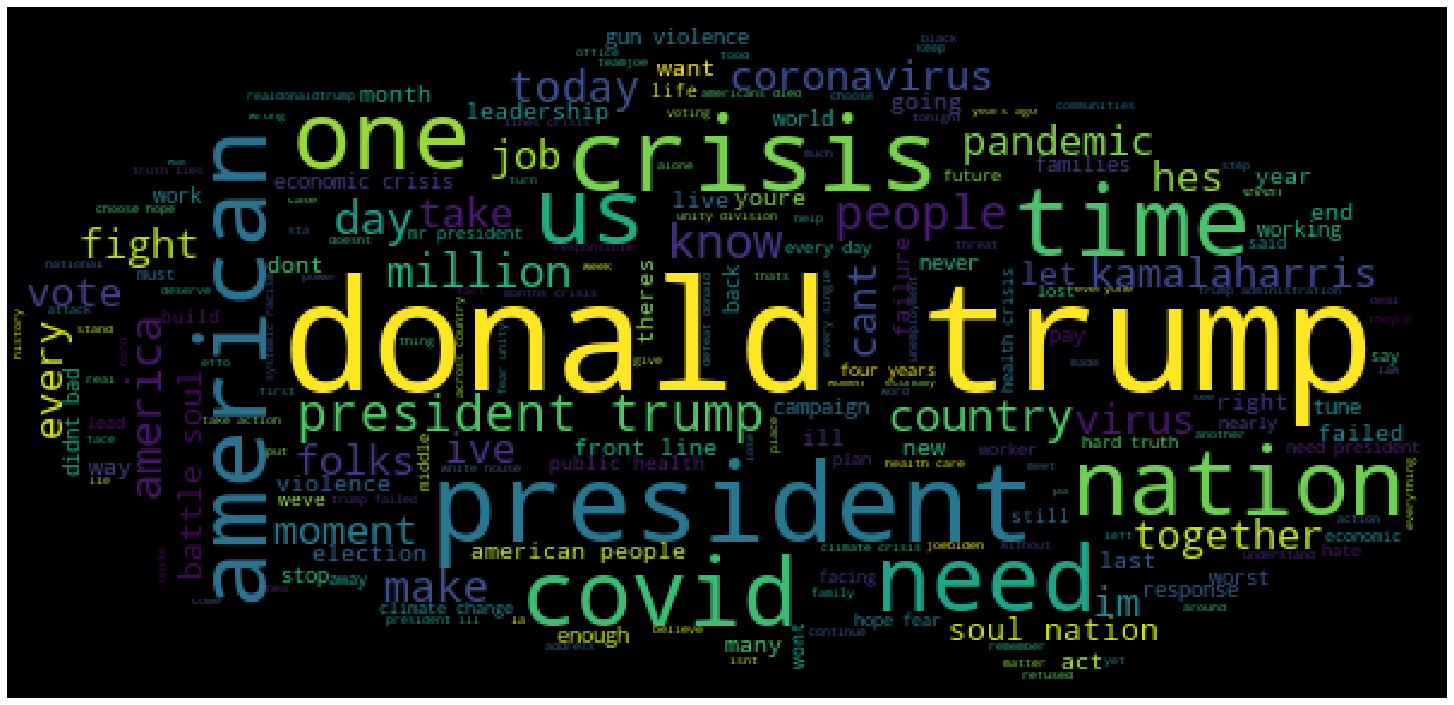

In [23]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('JB_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

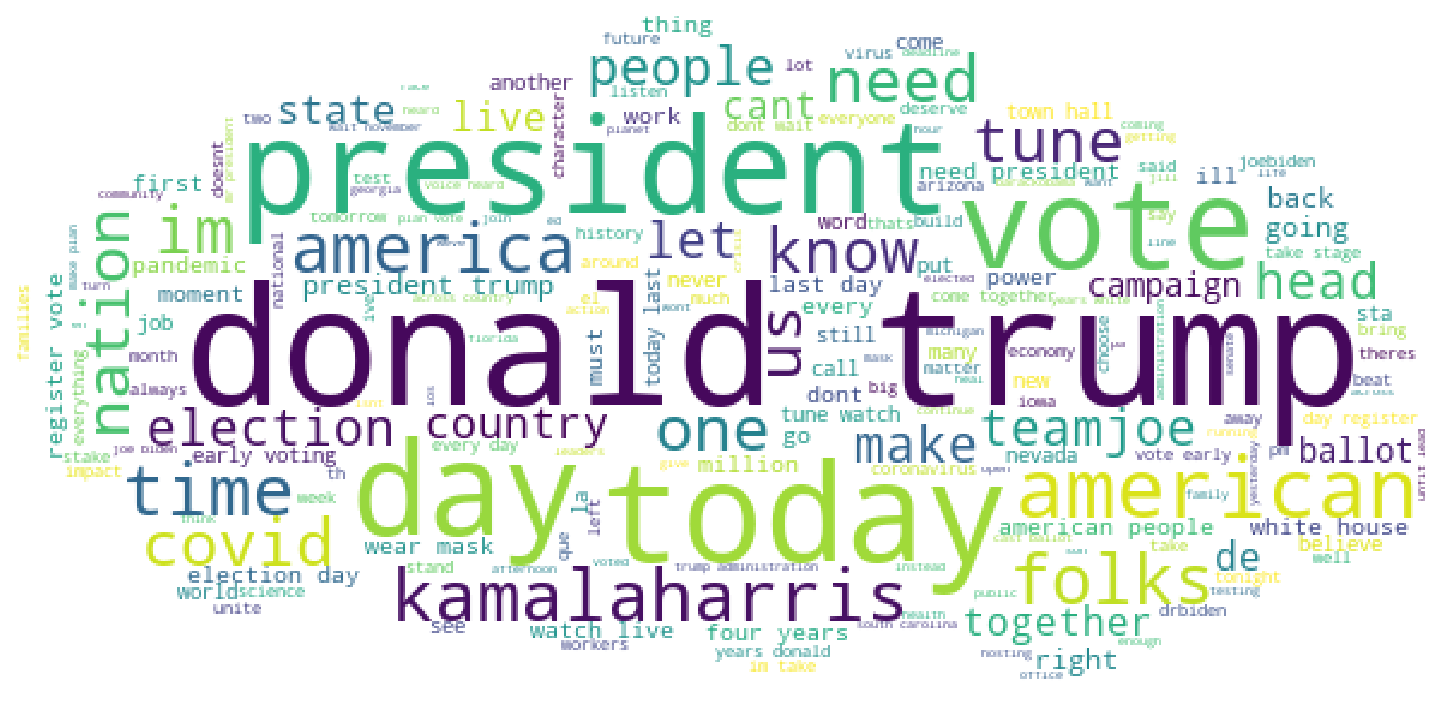

In [24]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('JB_neutral_tweets_wc.png')



# Wordcloud - All Tweets

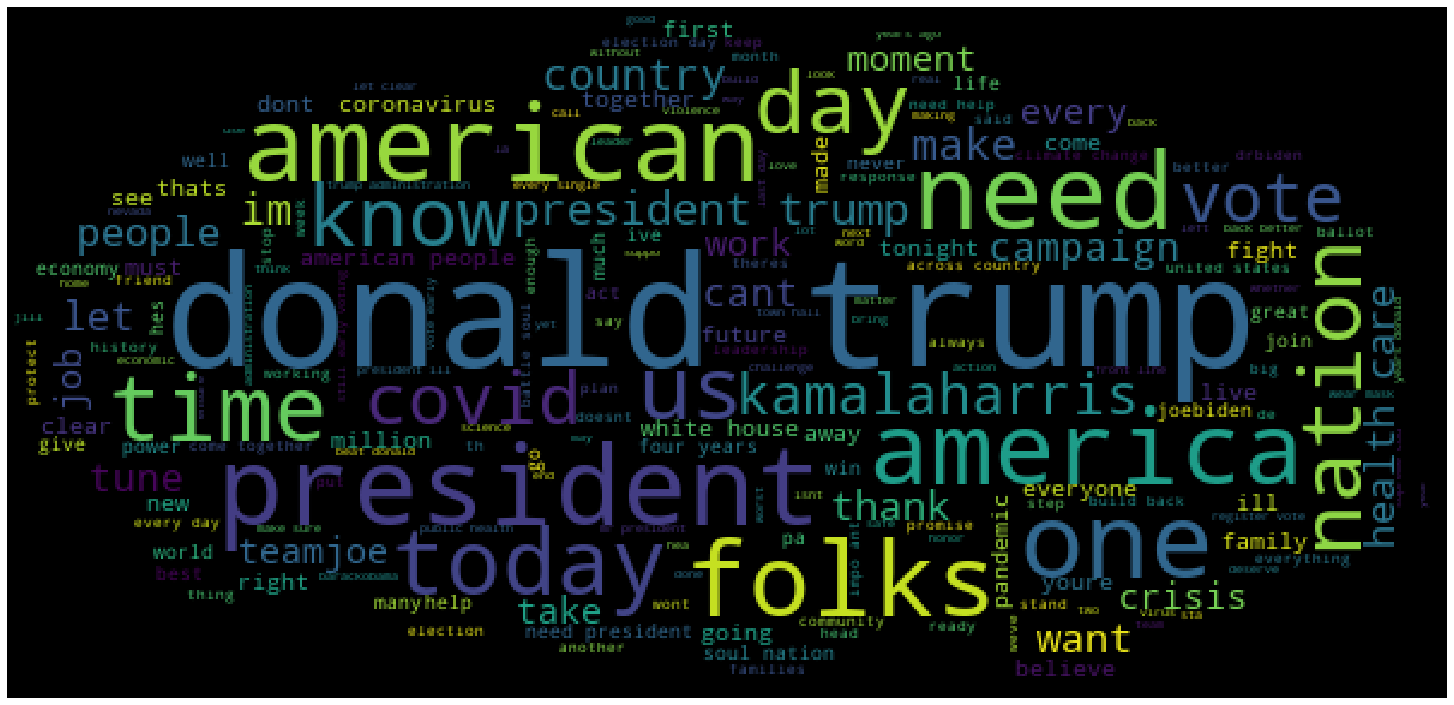

In [25]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('JB_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

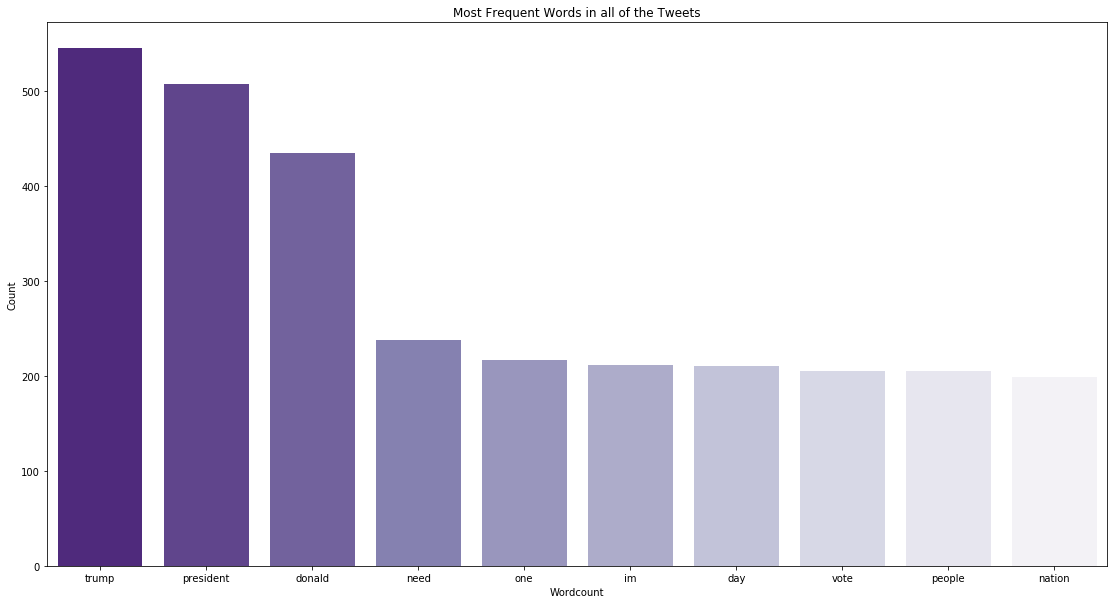

In [26]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd, palette="Purples_r",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("JB_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

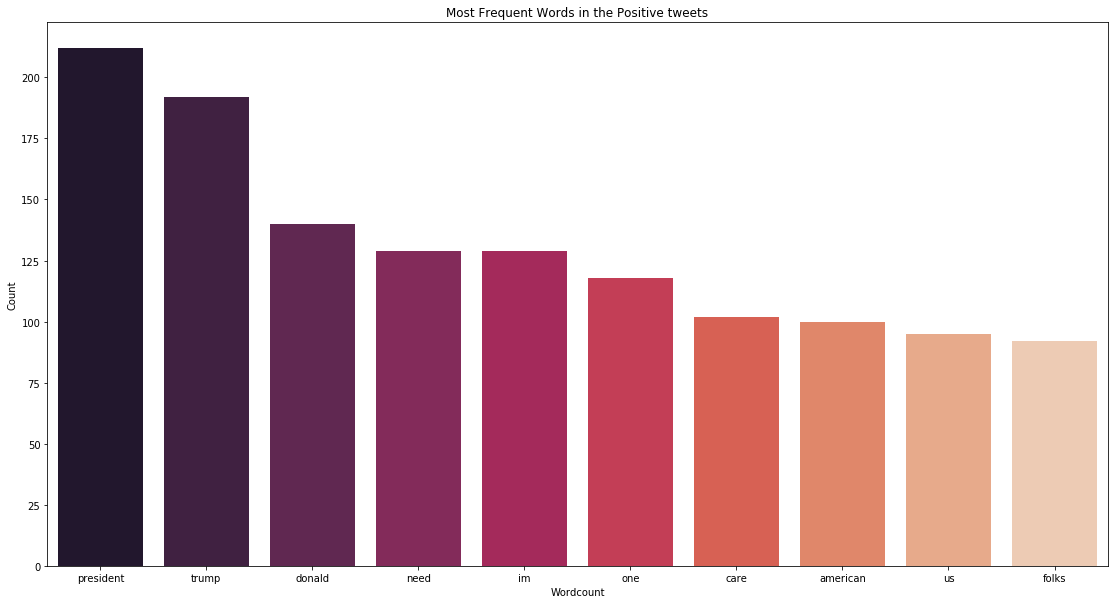

In [27]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp,palette="rocket", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("JB_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Negative Tweets

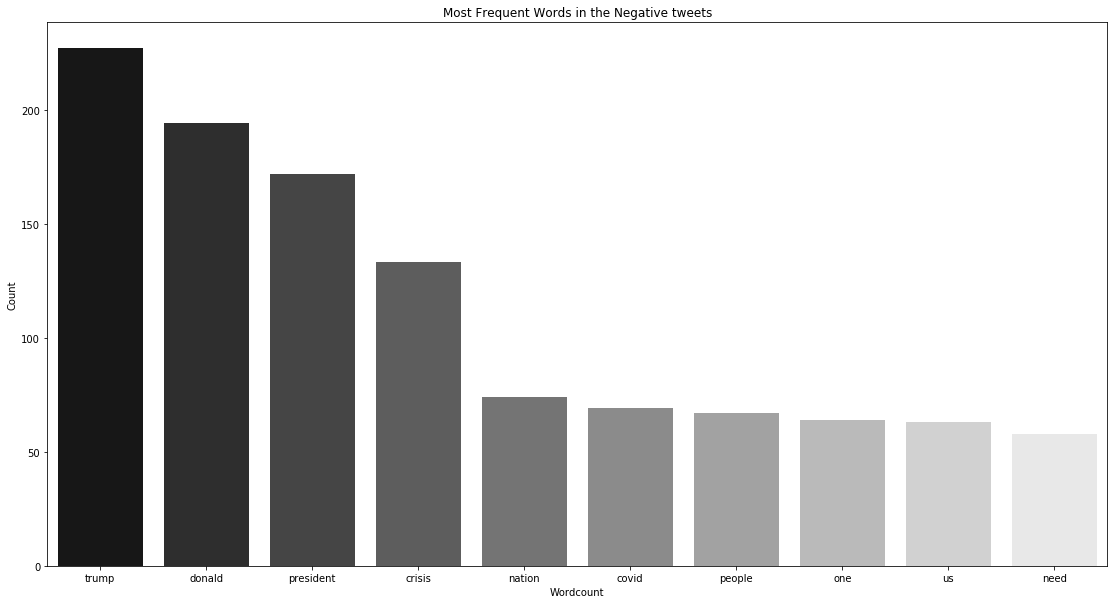

In [28]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("JB_negative_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

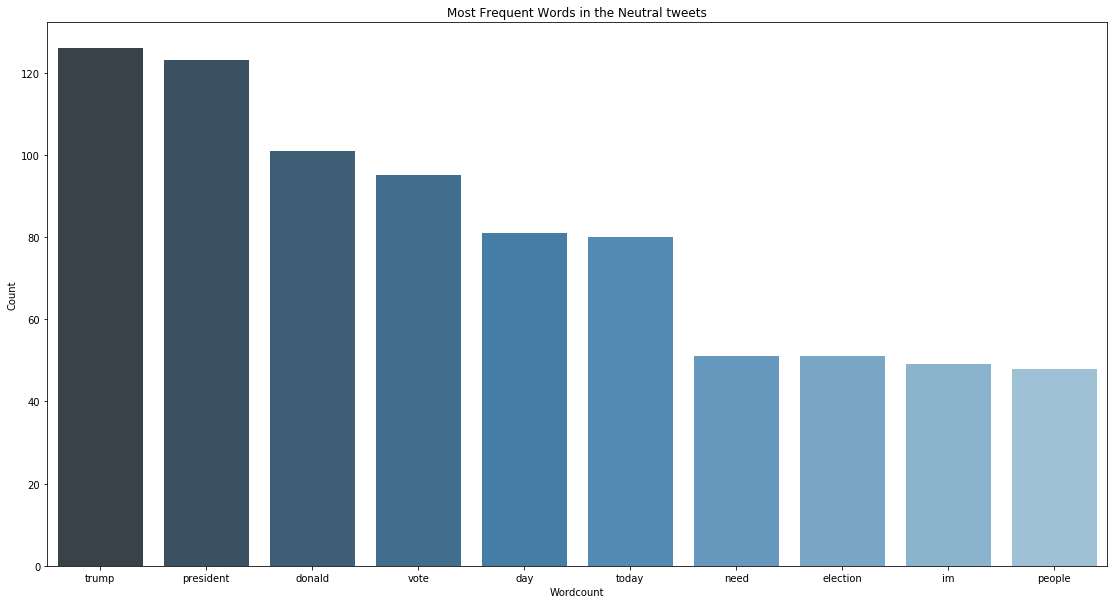

In [29]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du,palette= "Blues_d", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("JB_neutral_tweets_wf.png")
plt.show()